<a href="https://colab.research.google.com/github/viniciusanl/Natural-Language-Analysis-And-Processing/blob/main/natural_language_analysis_and_processin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motivação

O objetivo principal deste trabalho é estudar, entender e implementar as principais técnicas de análise e processamento de linguagem natural. Para que esse trabalho se torne possível, será necessário utilizar a biblioteca NLTK (Natural Language Toolkit) que possui ferramentas para realizar processamento simbólico e estatístico de linguagem natural.


* [Dcumentation NLTK - Natural Language Toolkit](https://www.nltk.org)
* [Natural Language Processing with Python Analyzing Text with the Natural Language Toolkit](https://www.nltk.org/book_1ed/)
* [Processing Raw Text](https://www.nltk.org/book_1ed/ch03.html)

# **Importar bibliotecas necessárias**

In [64]:
import nltk, urllib.request, os, re
import pandas as pd
from google.colab import drive 

# Download de todos os componentes necessários da biblioteca NLTK

In [2]:
nltk.download('all')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

# Criando as stopwords em português e inglês

In [3]:
english_stopwords = nltk.corpus.stopwords.words('english')
portuguese_stopwords = nltk.corpus.stopwords.words('portuguese')
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

# Adiciona algumas stopwords em português para tratar algumas divergências analíticas
add_stopwords_pt = ['capitulo', 'capítulo']
portuguese_stopwords.extend(add_stopwords_pt)

# Criando a função de processamento de texto

O objetivo dessa função e remover as quebras de linhas e alguns caracteres especiais que não foram removidos com o decode

In [56]:
def processing_text(str_text, _stopwords):
  text_format = re.findall(r'\b[A-zÀ-úü]+\b', str_text.lower())

  if _stopwords:
    no_stopwords = [words for words in text_format if words not in _stopwords and not len(words) == 1]
  else:
    no_stopwords = text_format

  return(' '.join(no_stopwords))

# Escolhendo os textos a serem utilizados na função de processamento e realizar leitura de arquivos armazenados no Google Drive

Foram utilizadas as os livros da escritora J. K. Rowling, especificamente a série do Harry Potter.

Para acessar os livros do Harry Potter que estão armazenados no Google Drive, vamos realizar a montagem do Drive para conseguir acessar como se fosse um repositório local de um PC.

**PS: Vamos realizar a montagem apenas uma vez a cada execução do algoritmo, para não gastar processamento desnecessário.**

In [ ]:
#drive.mount('/content/drive')

Acessando o repositório que foi montado no Google Drive para coletar a lista de todos os livros da pasta.

In [97]:
_path_books_drive = '/content/drive/MyDrive/Harry_Potter/'

list_books_hp = sorted(os.listdir(_path_books_drive))

list_books_hp

["Book 1 - The Philosopher's Stone.txt",
 'Book 2 - The Chamber of Secrets.txt',
 'Book 3 - The Prisoner of Azkaban.txt',
 'Book 4 - The Goblet of Fire.txt',
 'Book 5 - The Order of the Phoenix.txt',
 'Book 6 - The Half Blood Prince.txt',
 'Book 7 - The Deathly Hallows.txt']

Realizar a leitura de cada livro e passar o texto na função de processamento para remover pontuações e stopwords.

In [98]:
books_hp_no_processed = []
books_hp_processed = []

for book in list_books_hp:
  with open(_path_books_drive + book, encoding='utf8') as f:
    _book = ''
    for line in f:
      _book += line
    
    books_hp_no_processed.append(_book)
    books_hp_processed.append(processing_text(_book, english_stopwords))

Print do texto sem processamento e com o processamento da função.

In [99]:
books_hp_no_processed[0]

'/ \n\n\n\n\nTHE BOY WHO LIVED \n\nMr. and Mrs. Dursley, of number four, Privet Drive, \nwere proud to say that they were perfectly normal, \nthank you very much. They were the last people you’d \nexpect to be involved in anything strange or \nmysterious, because they just didn’t hold with such \nnonsense. \n\nMr. Dursley was the director of a firm called \nGrunnings, which made drills. He was a big, beefy \nman with hardly any neck, although he did have a \nvery large mustache. Mrs. Dursley was thin and \nblonde and had nearly twice the usual amount of \nneck, which came in very useful as she spent so \nmuch of her time craning over garden fences, spying \non the neighbors. The Dursley s had a small son \ncalled Dudley and in their opinion there was no finer \nboy anywhere. \n\nThe Dursleys had everything they wanted, but they \nalso had a secret, and their greatest fear was that \nsomebody would discover it. They didn’t think they \ncould bear it if anyone found out about the Potters

In [100]:
books_hp_processed[0]

'boy lived mr mrs dursley number four privet drive proud say perfectly normal thank much last people expect involved anything strange mysterious hold nonsense mr dursley director firm called grunnings made drills big beefy man hardly neck although large mustache mrs dursley thin blonde nearly twice usual amount neck came useful spent much time craning garden fences spying neighbors dursley small son called dudley opinion finer boy anywhere dursleys everything wanted also secret greatest fear somebody would discover think could bear anyone found potters mrs potter mrs dursley sister page harry potter philosophers stone rowling met several years fact mrs dursley pretended sister sister good nothing husband undursleyish possible dursleys shuddered think neighbors would say potters arrived street dursleys knew potters small son never even seen boy another good reason keeping potters away want dudley mixing child like mr mrs dursley woke dull gray tuesday story starts nothing cloudy sky out

# Códigos de terminal baseados em Linux

É possível utilizar comandos Linux para navegar pelo diretório depois que ele foi montado no comando acima.

In [101]:
!dir /content/drive/MyDrive/Harry_Potter/

Book\ 1\ -\ The\ Philosopher's\ Stone.txt
Book\ 2\ -\ The\ Chamber\ of\ Secrets.txt
Book\ 3\ -\ The\ Prisoner\ of\ Azkaban.txt
Book\ 4\ -\ The\ Goblet\ of\ Fire.txt
Book\ 5\ -\ The\ Order\ of\ the\ Phoenix.txt
Book\ 6\ -\ The\ Half\ Blood\ Prince.txt
Book\ 7\ -\ The\ Deathly\ Hallows.txt


# Tokenização dos textos

A tokenização, também conhecida como segmentação de palavras, é responsável por quebrar as palavras de cada texto analisado, ou seja, ele identifica o início e o término das palavras do texto e faz a divisão.

- Exemplo sem tokenização: "Harry Potter é a melhor série de todos os tempos"

- Texto tokenizado: "Harry", "Potter", "é", "a", "melhor", "série", "de", "todos", "os", "tempos"

In [102]:
tokens_hp_book_one = nltk.tokenize.word_tokenize(books_hp_processed[0])
tokens_hp_book_two = nltk.tokenize.word_tokenize(books_hp_processed[1])

# Análise de frequência de palavras

Uma distribuição de frequência pode ser usada para registrar a frequência de cada tipo de palavra em um documento, ou seja, essa função tem por objetivo calcular a inscidencia de vezes que uma palavra foi mencionada em um texto, documento, string.

In [103]:
prob_ho_book_one = nltk.probability.FreqDist(tokens_hp_book_one)
prob_ho_book_two = nltk.probability.FreqDist(tokens_hp_book_two)

# Print das 10 palavras que mais se repetem nos textos

In [104]:
print(prob_ho_book_one.most_common(10))
print(prob_ho_book_two.most_common(10))

[('harry', 1672), ('said', 794), ('potter', 447), ('ron', 429), ('stone', 427), ('hagrid', 370), ('page', 349), ('philosophers', 347), ('rowling', 347), ('hermione', 269)]
[('harry', 2035), ('said', 1218), ('ron', 706), ('potter', 509), ('chamber', 464), ('secrets', 428), ('page', 393), ('rowling', 379), ('hermione', 320), ('back', 279)]


# Palavra que mais se repete

In [105]:
print('Palavra que mais se repete no texto de ' + list_books_hp[0] + ': ' + prob_ho_book_one.max())
print('Palavra que mais se repete no texto de ' + list_books_hp[1] + ': ' + prob_ho_book_two.max())

Palavra que mais se repete no texto de Book 1 - The Philosopher's Stone.txt: harry
Palavra que mais se repete no texto de Book 2 - The Chamber of Secrets.txt: harry


# Plot de 20 palavras que mais se repete nos livros

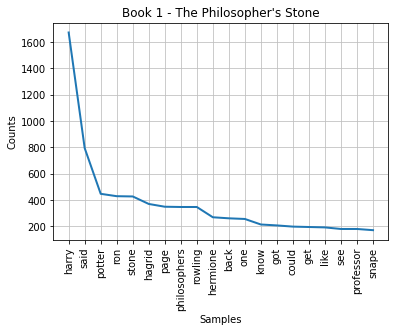

In [106]:
prob_ho_book_one.plot(20, title=list_books_hp[0].replace('.txt', ''))

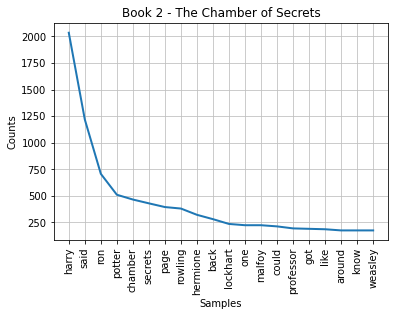

In [107]:
prob_ho_book_two.plot(20, title=list_books_hp[1].replace('.txt', ''))

In [108]:
analytics_hp_book_one = nltk.Text(tokens_hp_book_one)
analytics_hp_book_two = nltk.Text(tokens_hp_book_two)

# Palavras similares

In [109]:
analytics_hp_book_one.similar('harry')

ron hagrid hermione said malfoy would right dumbledore neville snape
dudley page got voldemort whispered yeh quirrell boy say rowling


In [110]:
analytics_hp_book_two.similar('harry')

ron hermione said hagrid riddle fred malfoy dumbledore lockhart right
page george hello oh percy myrtle time know come well


# Palavras dentro de diferentes contextos

Para isso, vamos pegar a terceira palavra que mais se repete nos livros.

In [111]:
analytics_hp_book_one.concordance('potter')

Displaying 25 of 447 matches:
could bear anyone found potters mrs potter mrs dursley sister page harry potte
otter mrs dursley sister page harry potter philosophers stone rowling met seve
r dursley blinked stared page harry potter philosophers stone rowling cat star
eral important telephone page harry potter philosophers stone rowling calls sh
ck stroked mustache thinking stupid potter unusual name sure lots people calle
nusual name sure lots people called potter son called harry come think even su
ister like people cloaks page harry potter philosophers stone rowling found lo
trying pull together let page harry potter philosophers stone rowling house st
 whisper whisper potters page harry potter philosophers stone rowling mrs durs
dered whether dared tell heard name potter decided dare instead said casually 
ley crept bedroom window page harry potter philosophers stone rowling peered f
g silver hair beard long page harry potter philosophers stone rowling enough t
ing professor mcgonaga

In [112]:
analytics_hp_book_two.concordance('ron')

Displaying 25 of 706 matches:
g quidditch harry missed best friends ron weasley hermione granger however seem
ng neither written summer even though ron said going ask harry come stay countl
t unlocking hedwig cage magic sending ron hermione letter worth risk underage w
ast fat legs would carry long silence ron hermione made harry feel cut magical 
orld even taunting dudley lost appeal ron hermione forgotten birthday give mess
 quickly know lots people like friend ron stopped thinking ron painful dobby le
ople like friend ron stopped thinking ron painful dobby leaned toward harry eye
otter chamber secrets rowling writing ron untidy scrawl even scribble looked th
e faced red haired long nosed someone ron weasley outside harry window page har
potter chamber secrets rowling burrow ron breathed harry creeping window pushin
eeping window pushing could talk bars ron harry mouth fell open full impact see
outh fell open full impact seeing hit ron leaning back window old turquoise car
rinning ha

# Bigramas de texto

In [113]:
analytics_hp_book_one.collocations()

philosophers stone; stone rowling; potter philosophers; page harry;
harry potter; uncle vernon; professor mcgonagall; aunt petunia; said
ron; said hagrid; crabbe goyle; privet drive; said harry; common room;
fred george; madam pomfrey; mrs dursley; invisibility cloak; mrs
norris; nimbus two


In [114]:
analytics_hp_book_two.collocations()

chamber secrets; secrets rowling; potter chamber; harry potter; page
harry; professor mcgonagall; said ron; uncle vernon; mrs weasley; fred
george; headless nick; nearly headless; madam pomfrey; said harry;
gilderoy lockhart; moaning myrtle; aunt petunia; hospital wing; mrs
norris; common room


# Teste de leitura de informações coletadas em um site

In [ ]:
text_web = urllib.request.urlopen("https://www.gutenberg.org/files/68611/68611-0.txt").read()

book_gutemberg = processing_text(str(text_web, 'utf8'), english_stopwords)

print(book_gutemberg)